In [548]:
%matplotlib inline
import numpy as np, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import pandas as pd
import sklearn
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
plt.rcParams['figure.figsize'] = (14, 5)

In [549]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

C:\Users\petrt\AppData\Local\Temp\ipykernel_8172\1379213752.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


In [550]:
E_pick, sr_Ep = librosa.load('audios/з_E (медиатор).wav')
E_finger, sr_Ef = librosa.load('audios/з_E (пальцы).wav')
B_pick, sr_Bp = librosa.load('audios/з_B ( медиатор) .wav')
B_finger, sr_Bf = librosa.load('audios/з_B (пальцы).wav')
G_pick, sr_Gp = librosa.load('audios/з_G (медиатор).wav')
G_finger, sr_Gf = librosa.load('audios/з_G (пальцы).wav')
D_pick, sr_Dp = librosa.load('audios/з_D (медиатор).wav')
D_finger, sr_Df = librosa.load('audios/з_D (пальцы).wav')
A_pick, sr_Ap = librosa.load('audios/з_A (медиатор.wav')
A_finger, sr_Af = librosa.load('audios/з_A (пальцы).wav')
e_pick, sr_ep = librosa.load('audios/з_e (медиатор)_2.wav')
e_finger, sr_ef = librosa.load('audios/з_e (пальцы)_2.wav')

melody_pick, sr_mp = librosa.load('audios/з_мелодия (медиатор).wav')
melody_finger, sr_mf = librosa.load('audios/з_мелодия(пальцы).wav')
sr_Ep

22050

In [551]:
E_pick, index_Ep = librosa.effects.trim(E_pick, frame_length=1024, hop_length=512)
E_finger, index_Ef = librosa.effects.trim(E_finger, frame_length=1024, hop_length=512)
B_pick, index_Bp = librosa.effects.trim(B_pick, frame_length=1024, hop_length=512)
B_finger, index_Bf = librosa.effects.trim(B_finger, frame_length=1024, hop_length=512)
G_pick, index_Gp = librosa.effects.trim(G_pick, frame_length=1024, hop_length=512)
G_finger, index_Gf = librosa.effects.trim(G_finger, frame_length=1024, hop_length=512)
D_pick, index_Dp = librosa.effects.trim(D_pick, frame_length=1024, hop_length=512)
D_finger, index_Df = librosa.effects.trim(D_finger, frame_length=1024, hop_length=512)
A_pick, index_Ap = librosa.effects.trim(A_pick, frame_length=1024, hop_length=512)
A_finger, index_Af = librosa.effects.trim(A_finger, frame_length=1024, hop_length=512)
e_pick, index_ep = librosa.effects.trim(e_pick, frame_length=1024, hop_length=512)
e_finger, index_ef = librosa.effects.trim(e_finger, frame_length=1024, hop_length=512)

melody_pick, index_mp = librosa.effects.trim(melody_pick, frame_length=1024, hop_length=512)
melody_finger, index_mf = librosa.effects.trim(melody_finger, frame_length=1024, hop_length=512)

In [552]:
note_data = {
    'E': {
        'pick': {
            'data': E_pick,
            'sample_rate': sr_Ep
        },
        'finger': {
            'data': E_finger,
            'sample_rate': sr_Ef
        }
    },
    'B': {
        'pick': {
            'data': B_pick,
            'sample_rate': sr_Bp
        },
        'finger': {
            'data': B_finger,
            'sample_rate': sr_Bf
        }
    },
    'G': {
        'pick': {
            'data': G_pick,
            'sample_rate': sr_Gp
        },
        'finger': {
            'data': G_finger,
            'sample_rate': sr_Gf
        }
    },
    'D': {
        'pick': {
            'data': D_pick,
            'sample_rate': sr_Dp
        },
        'finger': {
            'data': D_finger,
            'sample_rate': sr_Df
        }
    },
    'A': {
        'pick': {
            'data': A_pick,
            'sample_rate': sr_Ap
        },
        'finger': {
            'data': A_finger,
            'sample_rate': sr_Af
        }
    },
    'e': {
        'pick': {
            'data': e_pick,
            'sample_rate': sr_ep
        },
        'finger': {
            'data': e_finger,
            'sample_rate': sr_ef
        }
    },
    'melody': {
        'pick': {
            'data': melody_pick,
            'sample_rate': sr_mp
        },
        'finger': {
            'data': melody_finger,
            'sample_rate': sr_mf
        }
    }
}


In [553]:
# Create a list to store the data for each note
data_list = []

# Iterate over the dictionary and convert it into a list of tuples
for note, categories in note_data.items():
    for category, subcategories in categories.items():
        data = subcategories['data']
        sample_rate = subcategories['sample_rate']
        data_list.append((note, category, data, sample_rate))

# Create a multi-index DataFrame from the list of tuples
audio_df = pd.DataFrame(data_list, columns=['note', 'category', 'data', 'sample_rate'])
audio_df.set_index(['note', 'category'], inplace=True)
audio_df

data   
note   category                                                      
E      pick      [0.0035773236, 0.009949809, 0.016072925, 0.023...  \
       finger    [0.020415857, 0.029988453, 0.026941195, 0.0294...   
B      pick      [-0.05974919, -0.103672475, -0.09540241, -0.07...   
       finger    [-0.04940654, -0.09704374, -0.12480499, -0.164...   
G      pick      [0.062458307, 0.04656619, -0.017368108, -0.011...   
       finger    [0.0020089373, 0.002423577, 0.0014448948, 0.00...   
D      pick      [-0.038835168, -0.062433958, -0.033212036, 0.0...   
       finger    [0.0006489605, 0.0007699728, 0.0003245026, -6....   
A      pick      [0.0047900677, 0.001911819, -0.0047189146, -0....   
       finger    [-0.002545096, -0.0034598187, -0.0028437078, -...   
e      pick      [-0.03690961, -0.042502448, -0.008672124, 0.01...   
       finger    [-0.019538522, -0.02862759, -0.025068037, -0.0...   
melody pick      [-6.389266e-05, -2.3000233e-05, 5.29236e-05, 7...   
       finger    [4.656613e-10, -2.3283064e-10, -4.656613e-10, ...   

                 sample_rate  
note   category               
E      pick            22050  
       finger          22050  
B      pick            22050  
       finger          22050  
G      pick            22050  
       finger          22050  
D      pick            22050  
       finger          22050  
A      pick            22050  
       finger          22050  
e      pick            22050  
       finger          22050  
melody pick            22050  
       finger          22050

Вспомогательная функция для визуализации

In [554]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Spectral centroid and spectral bandwidth

## Центроид
Центроид - это один из спектральных характеристик звукового сигнала, используемых в анализе звука и обработке сигналов. Он определяет центр масс спектра звукового сигнала и описывает распределение частот в аудио сигнале. Более высокие значения цендроида означают большую концентрацию энергии звука в высоких частотах, и наоборот, меньшие значения характеризуют концентрацию энергии в низких частотах.

Спектр цифрового звукового сигнала может быть представлен в виде графика амплитуды по частоте, который называется спектром. Для вычисления спектрального центра сначала вычисляется сумма амплитуд всех частот сигнала, а затем находится средневзвешенное значение частот, умноженное на амплитуду каждой частоты. Формула для вычисления спектрального центра выглядит следующим образом:

\begin{equation}
C = \frac{\sum_{i=1}^N f_i \cdot S_i}{\sum_{j=1}^N S_i}
\end{equation}

где $C$ - центроид, $f_i$ - частота $i$-ой компоненты спектра, $S_i$ - амплитуда $i$-ой компоненты спектра, а $N$ - количество компонент в спектре.

Звук ноты *ми* при игре медиатором

In [555]:
ipd.Audio(E_pick, rate=sr_Ep)

Звук ноты *ми* при игре пальцем

In [556]:
ipd.Audio(E_finger, rate=sr_Ef)

График центроиды, наложенный на звуковую волну ноты *ми*, сыгранной медиатором:

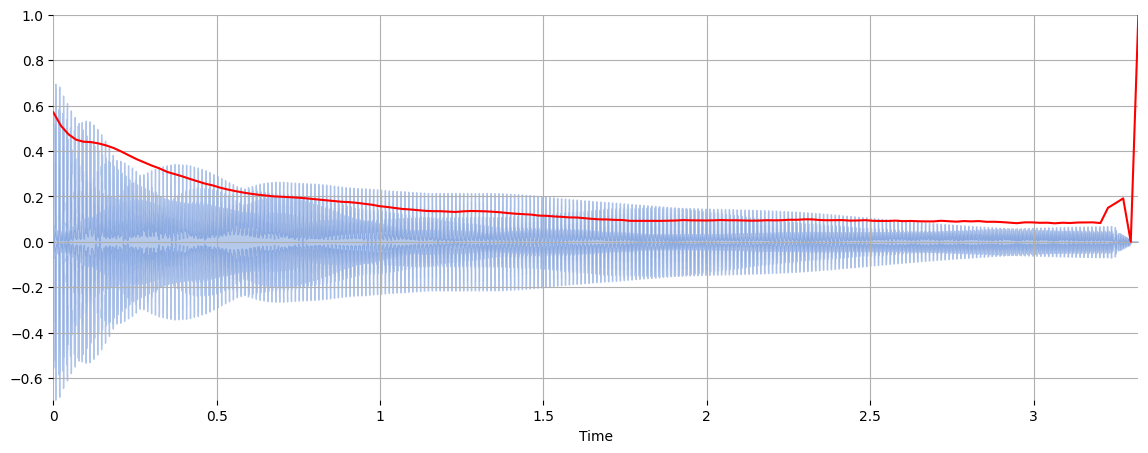

In [557]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
spectral_centroid_Ep = librosa.feature.spectral_centroid(y=E_pick, sr=sr_Ep, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

frames = range(len(spectral_centroid_Ep))
t_p = librosa.frames_to_time(frames)

librosa.display.waveshow(y=E_pick, sr=sr_Ep, alpha=0.4)
plt.plot(t_p, normalize(spectral_centroid_Ep), color='r') # normalize for visualization purposes

График центроиды, наложенный на звуковую волну ноты *ми*, сыгранной пальцем:

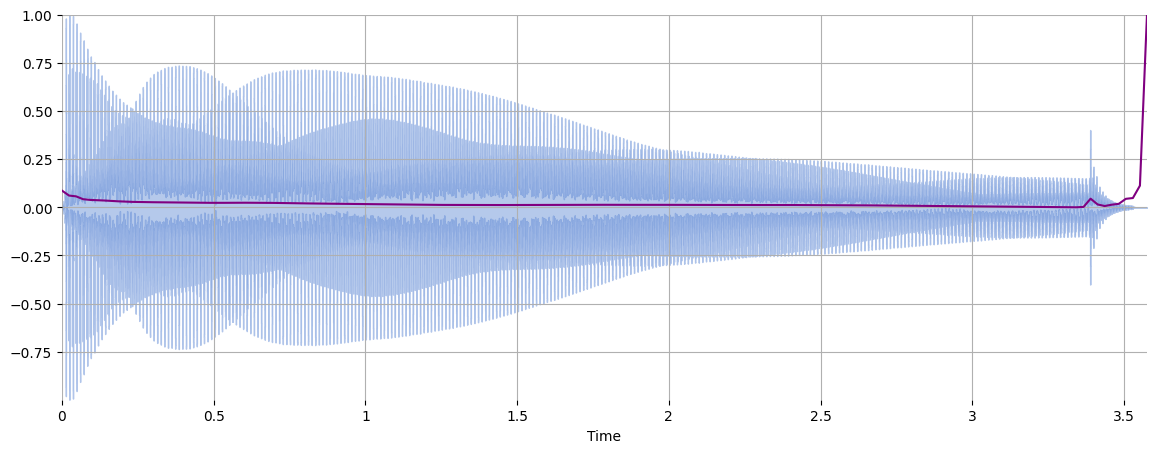

In [558]:
spectral_centroid_Ef = librosa.feature.spectral_centroid(y=E_finger, sr=sr_Ef, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

frames = range(len(spectral_centroid_Ef))
t_f = librosa.frames_to_time(frames)

librosa.display.waveshow(y=E_finger, sr=sr_Ef, alpha=0.4)
plt.plot(t_f, normalize(spectral_centroid_Ef), color='purple') # normalize for visualization purposes

Сравнение графиков центроид относительно друг друга:

,Средняя разность,Стандартное отклонение разности,Евклидово расстояние,Косинусное сходство,Коэффициент корреляции Пирсона
0,15.160576,37.03159,478.507039,0.991119,0.900369


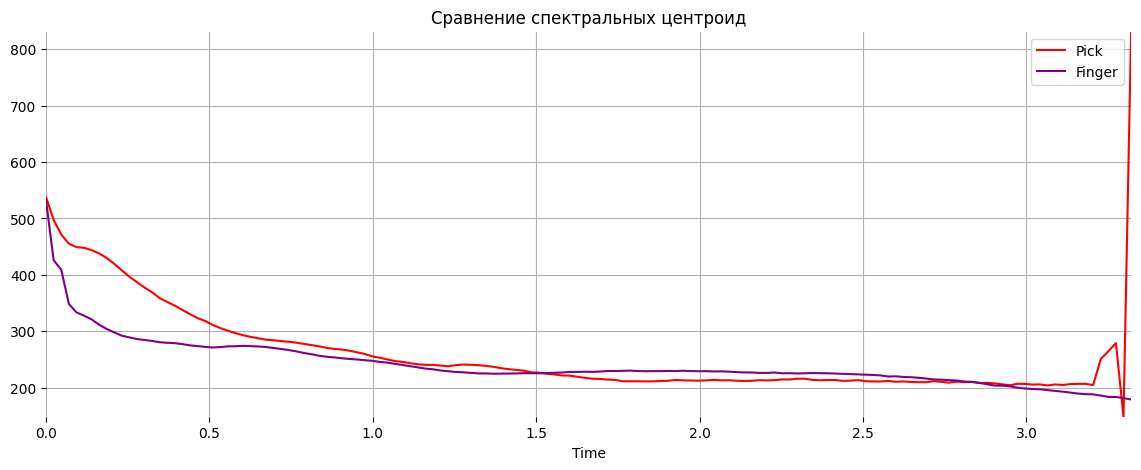

In [559]:
min_index = 0
if t_p[-1] < t_f[-1]:
    min_index = len(spectral_centroid_Ep)
else:
    min_index = len(spectral_centroid_Ef)
    
plt.plot(t_p[:min_index], spectral_centroid_Ep[:min_index], color='red', label='Pick')
plt.plot(t_f[:min_index], spectral_centroid_Ef[:min_index], color='purple', label='Finger')
plt.title('Сравнение спектральных центроид')
plt.xlabel('Time')
plt.legend()

centroid_mean = (spectral_centroid_Ep[:min_index-1]-spectral_centroid_Ef[:min_index-1]).mean()
centroid_std = np.std(spectral_centroid_Ep[:min_index-1] - spectral_centroid_Ef[:min_index-1])
euclidean_dist = euclidean(spectral_centroid_Ep[:min_index-1], spectral_centroid_Ef[:min_index-1])
cosine_sim = cosine_similarity([spectral_centroid_Ep[:min_index-1]], [spectral_centroid_Ef[:min_index-1]])[0][0]
pearson_corr, _ = pearsonr(spectral_centroid_Ep[:min_index-1], spectral_centroid_Ef[:min_index-1])

data = {
    'Средняя разность': [centroid_mean],
    'Стандартное отклонение разности': [centroid_std],
    'Евклидово расстояние': [euclidean_dist],
    'Косинусное сходство': [cosine_sim],
    'Коэффициент корреляции Пирсона': [pearson_corr]
}



df_E = pd.DataFrame(data)

display(df_E)

Среди рассчитанных метрик схожести векторов центроид особо полезными являются косинусное сходство и коэффициент корреляции Пирсона. Коэффициент корреляции Пирсона отражает линейные связи и определяет, насколько близко спектральное содержание аудиофайлов совпадает с точки зрения их центроидов. Косинусное сходство измеряет сходство направления или формы двух векторов, независимо от их величины. В случае сравнения центроидных векторов, он фокусируется на сходстве их форм. В исследовании звучания струны гитары при различном стиле игры косинусное сходство может помочь определить сходства или различия в спектральных формах или паттернах аудиофайлов.
На графике можно увидеть, что центроиды при игре разными стилями имеют очень схожую форму и лежат близко дург к другу, что означает, что спектральное содержание двух аудиосигналов очень схоже. Данный факт также подтверждают значения косинусного сходства и коэффициента корреляции Пирсона. В данном  примере получилось скорее подтвердить схожесть звучания двух аудифайлов, нежели найти в них характерные отличительные черты.

**Сравнение стилей игры для каждой ноты и мелодии**

In [560]:
# Create an empty list to store the metrics data
metrics_data = []
# notes_list = audio_df.index.get_level_values('note').unique().tolist()
notes = ['E', 'B', 'G', 'D', 'A', 'e', 'melody']
categories = ['pick', 'finger']
columns = ['Средняя разность', 'Стандартное отклонение разности', 'Евклидово расстояние',\
           'Косинусное сходство', 'Коэффициент корреляции Пирсона']

notes_list = []
for note in notes:
    for category in categories:
        notes_list.append((note, category))

# Iterate over each note
for note in audio_df.index.get_level_values('note'):
    # Get the audio data and sample rate for the 'pick' and 'finger' playstyles of the current note
    data_pick = audio_df.loc[(note, 'pick'), 'data']
    sample_rate_pick = audio_df.loc[(note, 'pick'), 'sample_rate']
    data_finger = audio_df.loc[(note, 'finger'), 'data']
    sample_rate_finger = audio_df.loc[(note, 'finger'), 'sample_rate']
    
    # Calculate the spectral centroids
    spectral_centroid_pick = librosa.feature.spectral_centroid(y=data_pick, sr=sample_rate_pick, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
    spectral_centroid_finger = librosa.feature.spectral_centroid(y=data_finger, sr=sample_rate_finger, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
    
    frames = range(len(spectral_centroid_pick))
    t_p = librosa.frames_to_time(frames)
    frames = range(len(spectral_centroid_finger))
    t_f = librosa.frames_to_time(frames)
    
    min_index = 0
    if t_p[-1] < t_f[-1]:
        min_index = len(spectral_centroid_pick)
    else:
        min_index = len(spectral_centroid_finger)
    
    # Calculate the metrics
    centroid_mean = (spectral_centroid_pick[:min_index-1] - spectral_centroid_finger[:min_index-1]).mean()
    centroid_std = np.std(spectral_centroid_pick[:min_index-1] - spectral_centroid_finger[:min_index-1])
    euclidean_dist = euclidean(spectral_centroid_pick[:min_index-1], spectral_centroid_finger[:min_index-1])
    cosine_sim = cosine_similarity([spectral_centroid_pick[:min_index-1]], [spectral_centroid_finger[:min_index-1]])[0][0]
    pearson_corr, _ = pearsonr(spectral_centroid_pick[:min_index-1], spectral_centroid_finger[:min_index-1])
    
    metrics_data.append((centroid_mean, centroid_std, euclidean_dist, cosine_sim, pearson_corr))
    
# Create the DataFrame from the metrics data list
metrics_df = pd.DataFrame(metrics_data, index=notes_list, columns=columns)
metrics_df.index = pd.MultiIndex.from_tuples(metrics_df.index, names=['note', 'playstyle'])
metrics_df.reset_index(level='playstyle', inplace=True)
metrics_df = metrics_df.drop('playstyle', axis=1)
metrics_df.drop_duplicates(inplace=True)
metrics_df

,Средняя разность,Стандартное отклонение разности,Евклидово расстояние,Косинусное сходство,Коэффициент корреляции Пирсона
note,,,,,
E,15.160576,37.031590,478.507039,0.991119,0.900369
B,-32.682609,66.423166,786.931675,0.996844,0.897124
G,232.270021,175.313816,3634.659577,0.987506,0.623627
D,105.584288,45.680598,1390.062869,0.997956,0.951295
A,47.385221,219.469573,2848.924832,0.886370,0.625487
e,-284.685556,330.213092,5286.087700,0.956682,0.386935
melody,132.925056,243.237663,5317.403148,0.953056,0.395681


Как можно видеть из таблицы, для нот *рэ*, *ми* и *си* разницы в спектральном содержании практически нет. А вот ноты *соль*, *ля* и *ми* (нижняя октава) уже отличаются от себя при игре разными стилями, особенно это видно для *ми* (нижняя октава).

Теперь посчитаем некоторые метрики отдельно для каждой центроиды и проанализируем полученные данные.

In [561]:
metrics_data = []
categories = ['pick', 'finger']
columns = ['Среднее значение', 'Стандартное отклонение', 'Skewness']

# Iterate over each note
for note in audio_df.index.get_level_values('note'):
    note_metrics_data = []
    
    # Iterate over each playstyle (pick and finger)
    for playstyle in categories:
        # Get the audio data and sample rate for the current note and playstyle
        data = audio_df.loc[(note, playstyle), 'data']
        sample_rate = audio_df.loc[(note, playstyle), 'sample_rate']
        
        # Calculate the spectral centroids
        spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sample_rate, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
        
        # Calculate the metrics
        centroid_mean = spectral_centroid.mean()
        centroid_std = np.std(spectral_centroid)
        centroid_skew = scipy.stats.skew(spectral_centroid)
        
        note_metrics_data.extend([centroid_mean, centroid_std, centroid_skew])
    
    metrics_data.append(note_metrics_data)

# Create the DataFrame from the metrics data list
metrics_df = pd.DataFrame(metrics_data, index=notes_list, columns=pd.MultiIndex.from_product([categories, columns], names=['playstyle', None]))
metrics_df.index = pd.MultiIndex.from_tuples(metrics_df.index, names=['note', 'playstyle'])
metrics_df.reset_index(level='playstyle', inplace=True)
metrics_df = metrics_df.drop('playstyle', axis=1)
metrics_df.drop_duplicates(inplace=True)
metrics_df


C:\Users\petrt\AppData\Local\Temp\ipykernel_8172\1209926249.py:31: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  metrics_df = metrics_df.drop('playstyle', axis=1)


playstyle             pick                                            finger   
          Среднее значение Стандартное отклонение  Skewness Среднее значение   
note                                                                           
E               260.834100              86.074081  2.984367       271.013825  \
B               809.907452             166.841633 -1.244517       837.335790   
G              1071.649627             219.797877 -0.491532       870.773442   
D               570.940554             129.128963  0.625159       502.272593   
A               408.729381             443.978250  7.263008       625.693674   
e              1028.278075             332.850077  0.743211      1625.899132   
melody          860.799123             286.967067  6.332071       747.970143   

playstyle                                    
          Стандартное отклонение   Skewness  
note                                         
E                     325.880129  11.783408  
B                     458.869058   9.733608  
G                     316.631357   9.414327  
D                     354.944752  10.903473  
A                     855.087082   2.820411  
e                     723.180180   1.642080  
melody                403.044574   3.110705

Из результатов, приведенных в таблице выше, можно увидеть, что среднее значение центроиды незначительно отличается при разных стилях игры. Довольно сильно варьируется показатель skewness, который в большинстве случаев показывает меньшие  значения при игре медиатором. Однозначно можно сказать, что стандартное отклонение при игре пальцами гораздо выше, чем при игре медиатором, что может указывать на более широкий диапазон гармонического содержания при игре данным стилем. Этот параметр можно отметить как отличительную характеристику двух стилей игры.

**Spectral bandwidth**

Метод Spectral Bandwidth (спектральная ширина полосы) - обозначает диапазон частот, присутствующих в сигнале или спектре. Cпектральная ширина предоставляет информацию о ширине или разбросе частотного содержания в сигнале. Она показывает, насколько сконцентрирована или распределена энергия или мощность сигнала по различным частотам. 

Для понимания определения можно представить простой пример музыкального тона, воспроизводимого на гитарной струне. Когда вы щипаете гитарную струну, она вибрирует и производит звук с доминирующей частотой (основной частотой) и дополнительными более высокочастотными компонентами, называемыми гармониками. Спектральная полоса этого звука охватывает диапазон частот от самой низкой гармоники до самой высокой гармоники, присутствующей в звуке.

Узкая спектральная полоса означает, что большая часть энергии или мощности сигнала сосредоточена вокруг определенной частоты или небольшого диапазона частот. Это может соответствовать чистому тону или сигналу с четко определенным частотным содержанием.

С другой стороны, широкая полоса спектра указывает на то, что энергия или мощность сигнала распределена по большему диапазону частот. Это может соответствовать сложному звуку или сигналу с широким частотным содержанием, например, белому шуму.

Формально, спектральная ширина полосы может быть определена следующим образом:

$$ \left( \sum_k S(k) \left(f(k) - f_c \right)^p \right)^{\frac{1}{p}} $$

где $S(k)$ является спектральной величиной в частотном бине $k$, $f(k)$ - частота, привязанная к частотному бину $k$, и $f_c$ - спектральный центроид. Когда $p = 2$, то данная величина является вторым центральным моментом спектра. В контексте спектра второй центральный момент/дисперсия предоставляет информацию о разбросе или дисперсии частотных или амплитудных значений в спектре. Более высокая дисперсия указывает на более широкий разброс значений, в то время как более низкая дисперсия указывает на более узкую концентрацию значений вокруг среднего значения(центроида).

Спектральная полоса пропускания может помочь различить техники игры на гитаре в стиле pick-style и fingerstyle. Как правило, при игре в стиле pick-style получается более яркий и сфокусированный звук с более узким спектральным диапазоном, в то время как при игре в стиле fingerstyle звук получается более мягким и насыщенным с более широким спектральным диапазоном. Анализ спектрального диапазона позволяет выявить эти различия в частотном содержании.

Звук ноты *ре* при игре медиатором

In [562]:
ipd.Audio(D_pick, rate=sr_Dp)

Звук ноты *ре* при игре пальцем

In [563]:
ipd.Audio(D_finger, rate=sr_Df)

[Text(0.5, 1.0, 'log Power spectrogram for D note (pick)')]

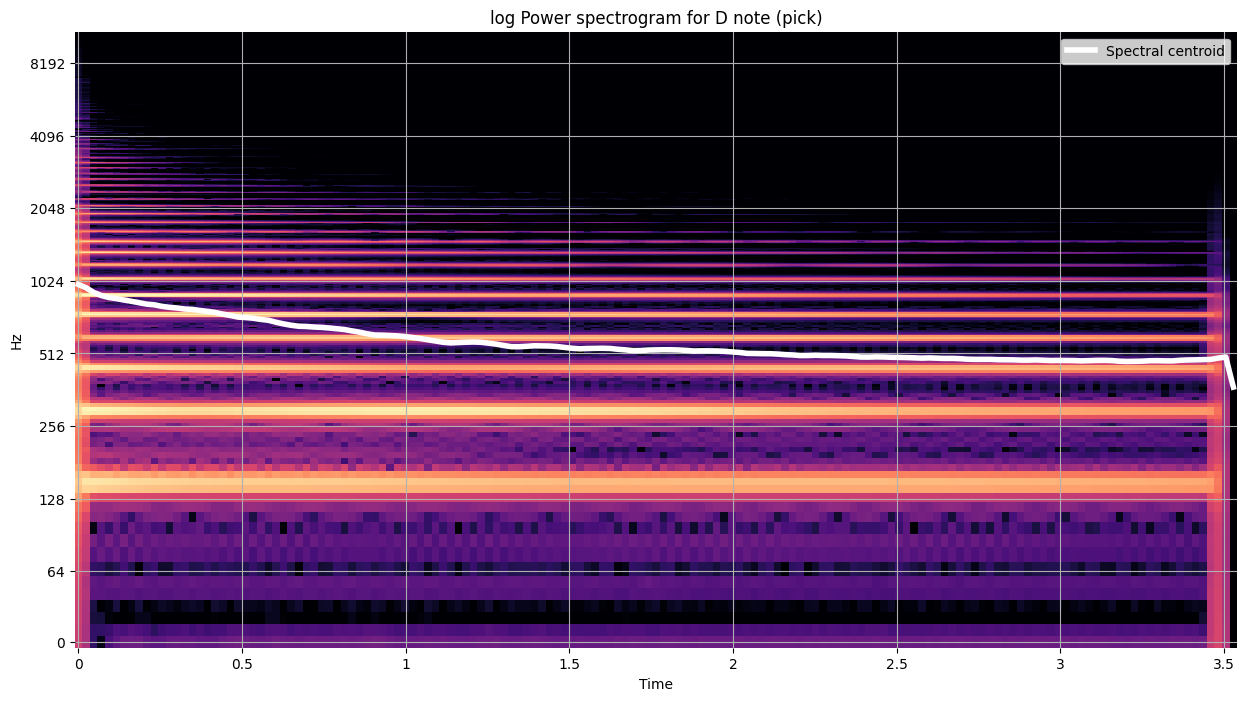

In [564]:
S_pick, phase_pick = librosa.magphase(librosa.stft(y=D_pick))
spectral_centroid_Dp = librosa.feature.spectral_centroid(S=S_pick)

times_p = librosa.times_like(spectral_centroid_Dp)
fig, ax = plt.subplots(figsize=(15,8))
librosa.display.specshow(librosa.amplitude_to_db(S_pick, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, spectral_centroid_Dp.T, label='Spectral centroid', color='white', linewidth=4)
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram for D note (pick)')

[Text(0.5, 1.0, 'log Power spectrogram for D note (pick)')]

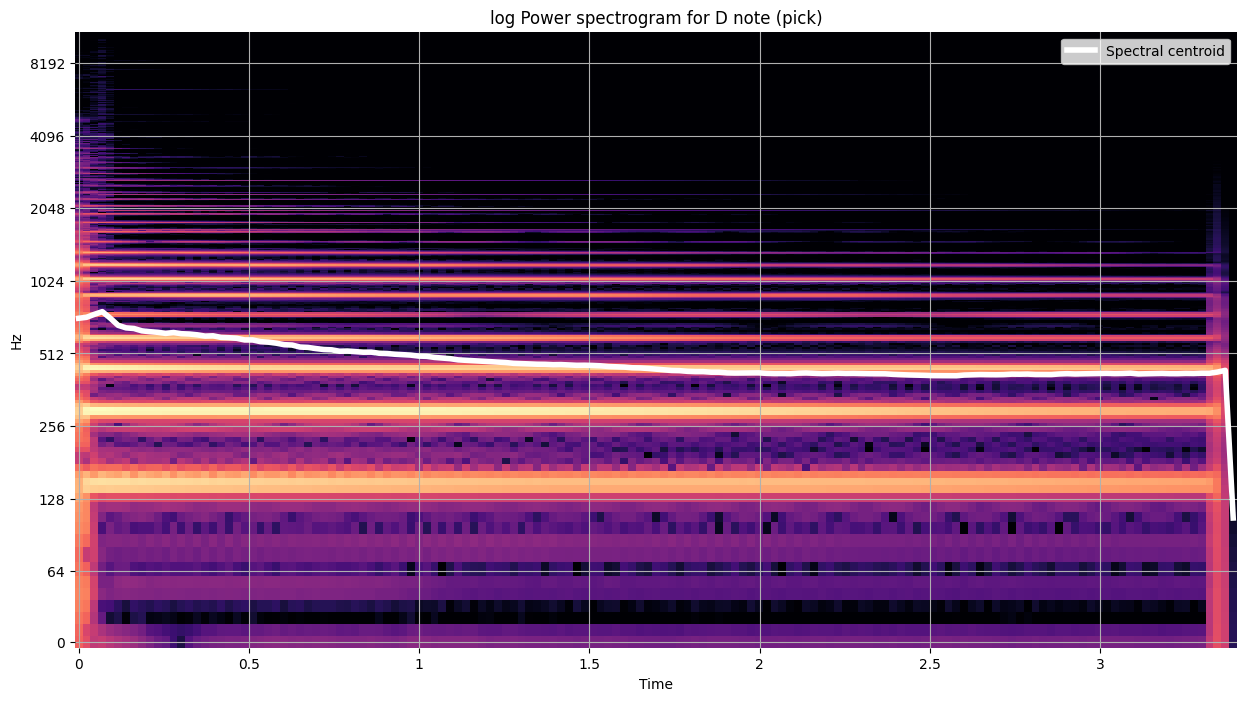

In [565]:
S_finger, phase_finger = librosa.magphase(librosa.stft(y=D_finger))
spectral_centroid_Df = librosa.feature.spectral_centroid(S=S_finger)

times_f = librosa.times_like(spectral_centroid_Df)
fig, ax = plt.subplots(figsize=(15,8))
librosa.display.specshow(librosa.amplitude_to_db(S_finger, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times_f, spectral_centroid_Df.T, label='Spectral centroid', color='white', linewidth=4)
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram for D note (pick)')

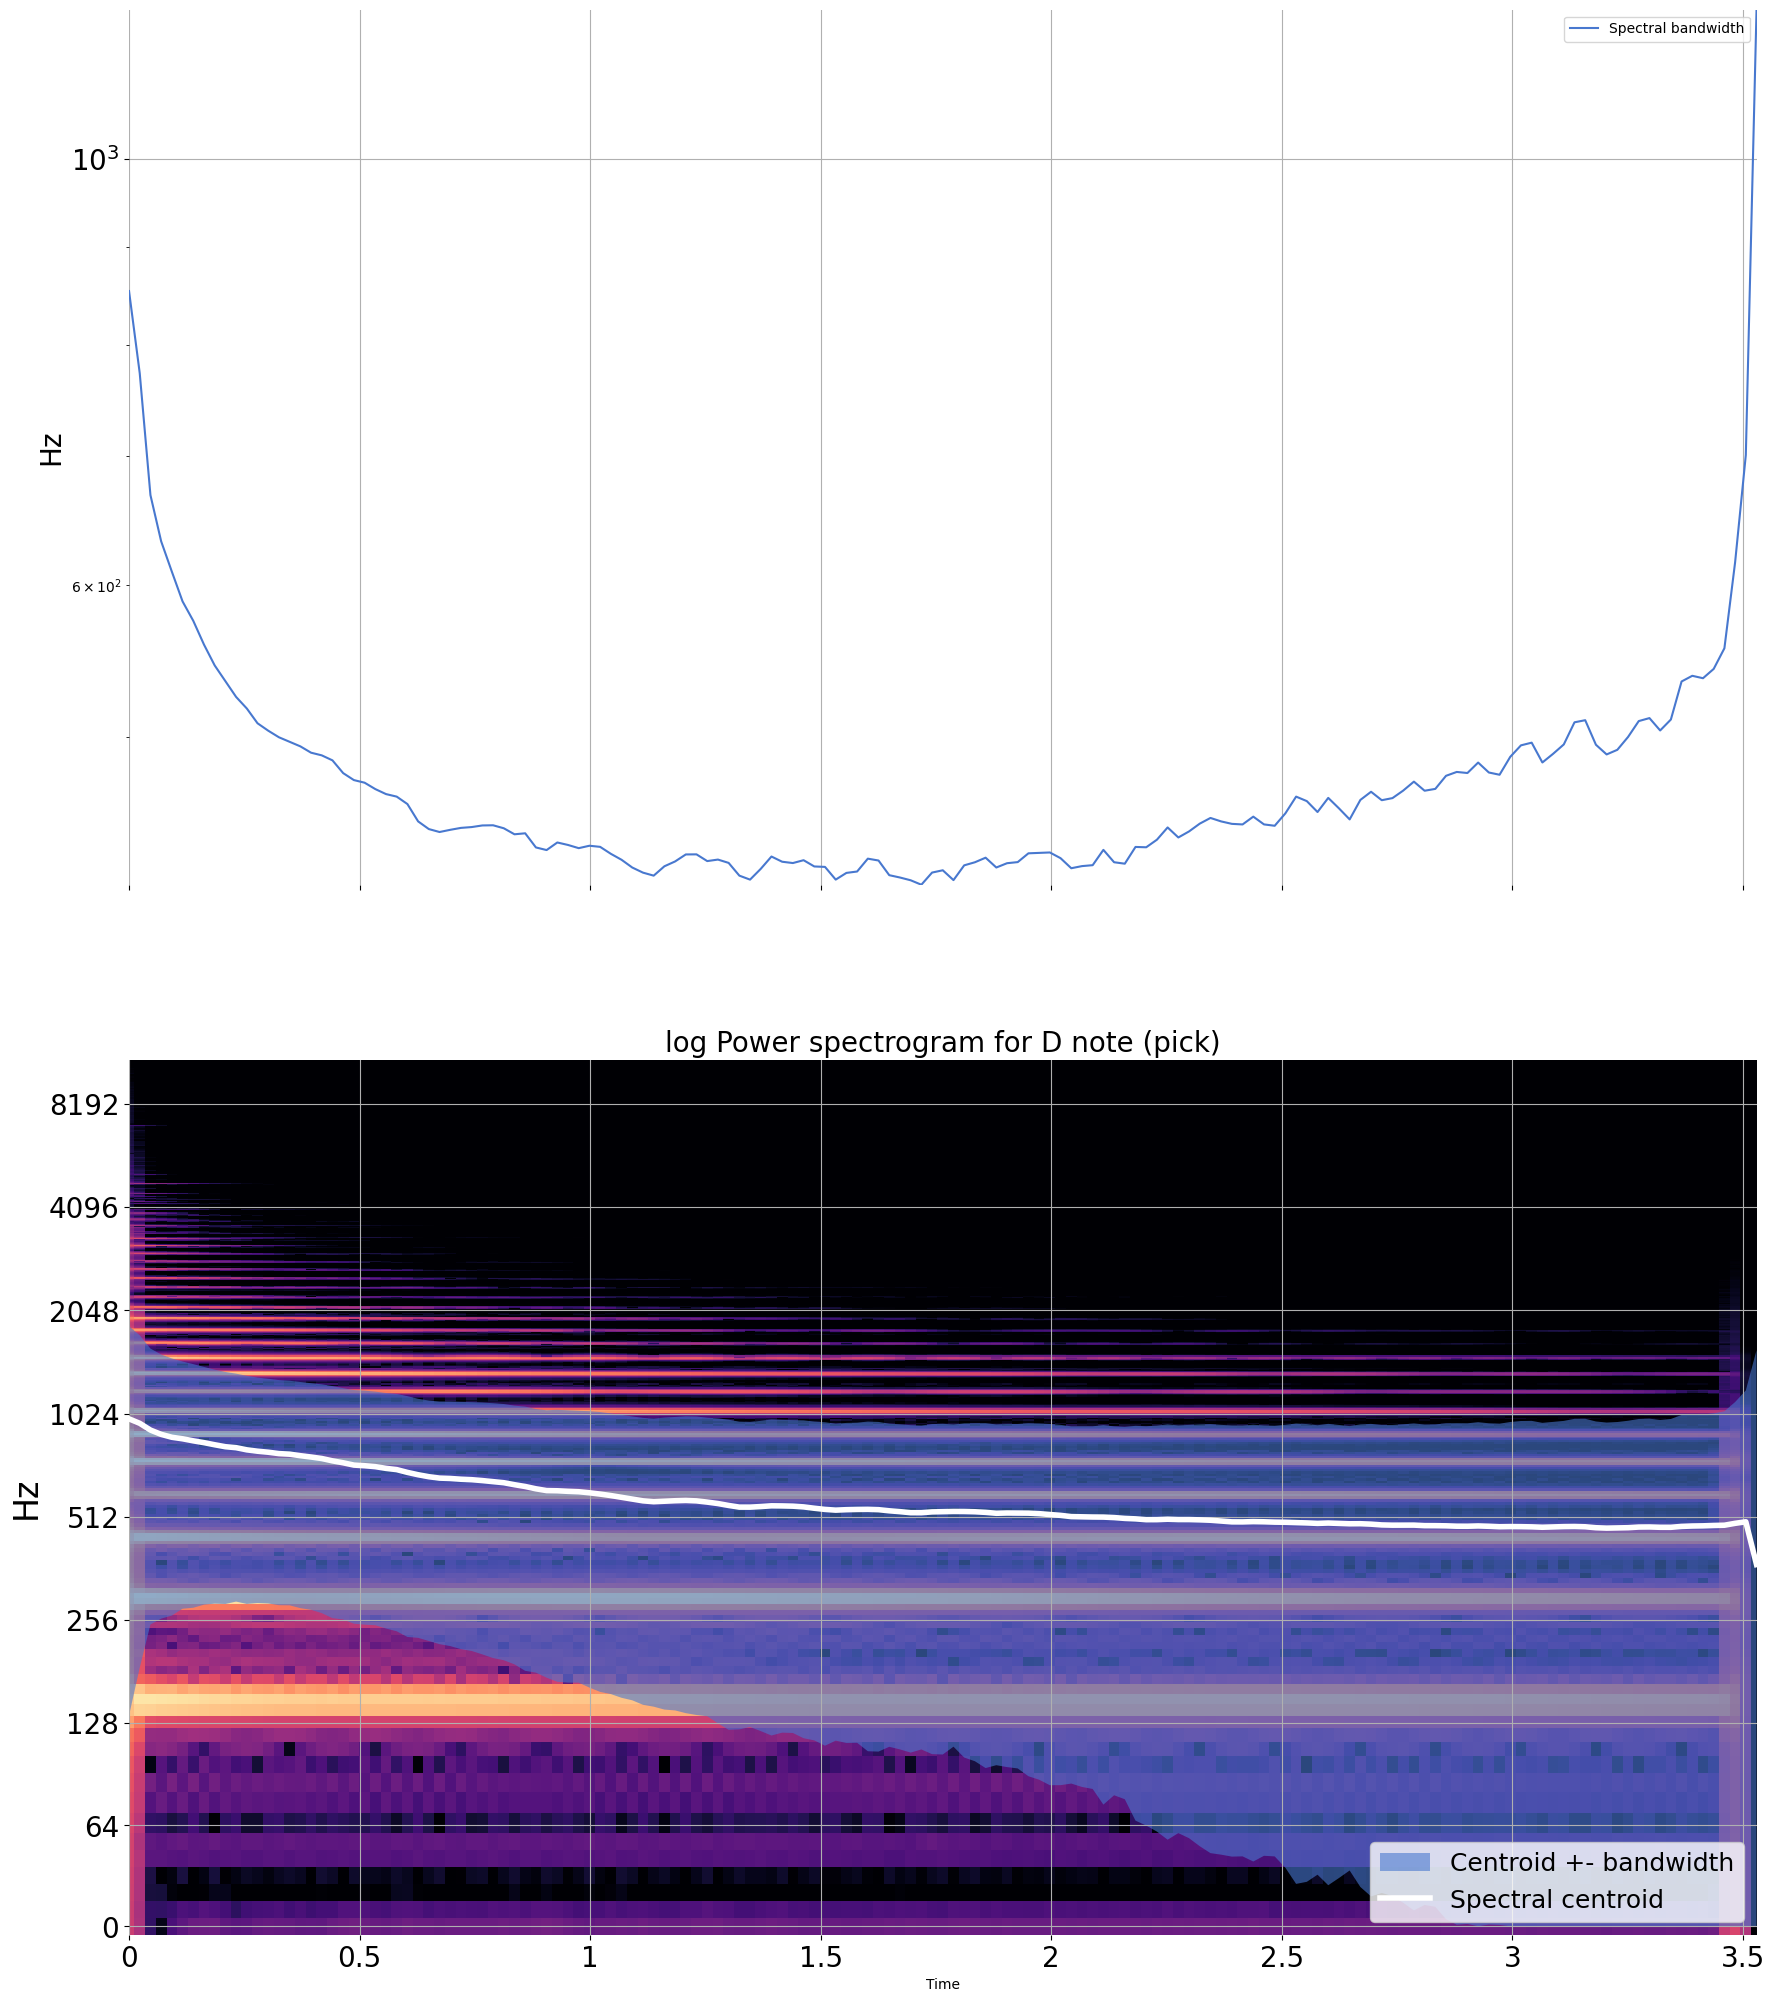

In [566]:
spec_bw_pick = librosa.feature.spectral_bandwidth(y=D_pick, sr=sr_Dp)

fig, ax = plt.subplots(figsize=(21, 25), nrows=2, sharex=True)
ax[0].semilogy(times_p, spec_bw_pick[0], label='Spectral bandwidth')
ax[0].set_ylabel('Hz', fontsize=20)
ax[0].set_xticks([])
ax[0].set_xlim([times_p.min(), times_p.max()])
ax[0].tick_params(axis='both', labelsize=20)
ax[0].set_xlabel('Time', fontsize=32)
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set_title('log Power spectrogram for D note (pick)', fontsize=20)
ax[1].fill_between(times_p, np.maximum(0, spectral_centroid_Dp[0] - spec_bw_pick[0]),
                   np.minimum(spectral_centroid_Dp[0] + spec_bw_pick[0], sr_Dp/2),
                   alpha=0.6, label='Centroid +- bandwidth')
ax[1].set_ylabel('Hz', fontsize=24)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].plot(times, spectral_centroid_Dp[0], label='Spectral centroid', color='w', linewidth=4)
ax[1].legend(loc='lower right', fontsize=18)

plt.show()


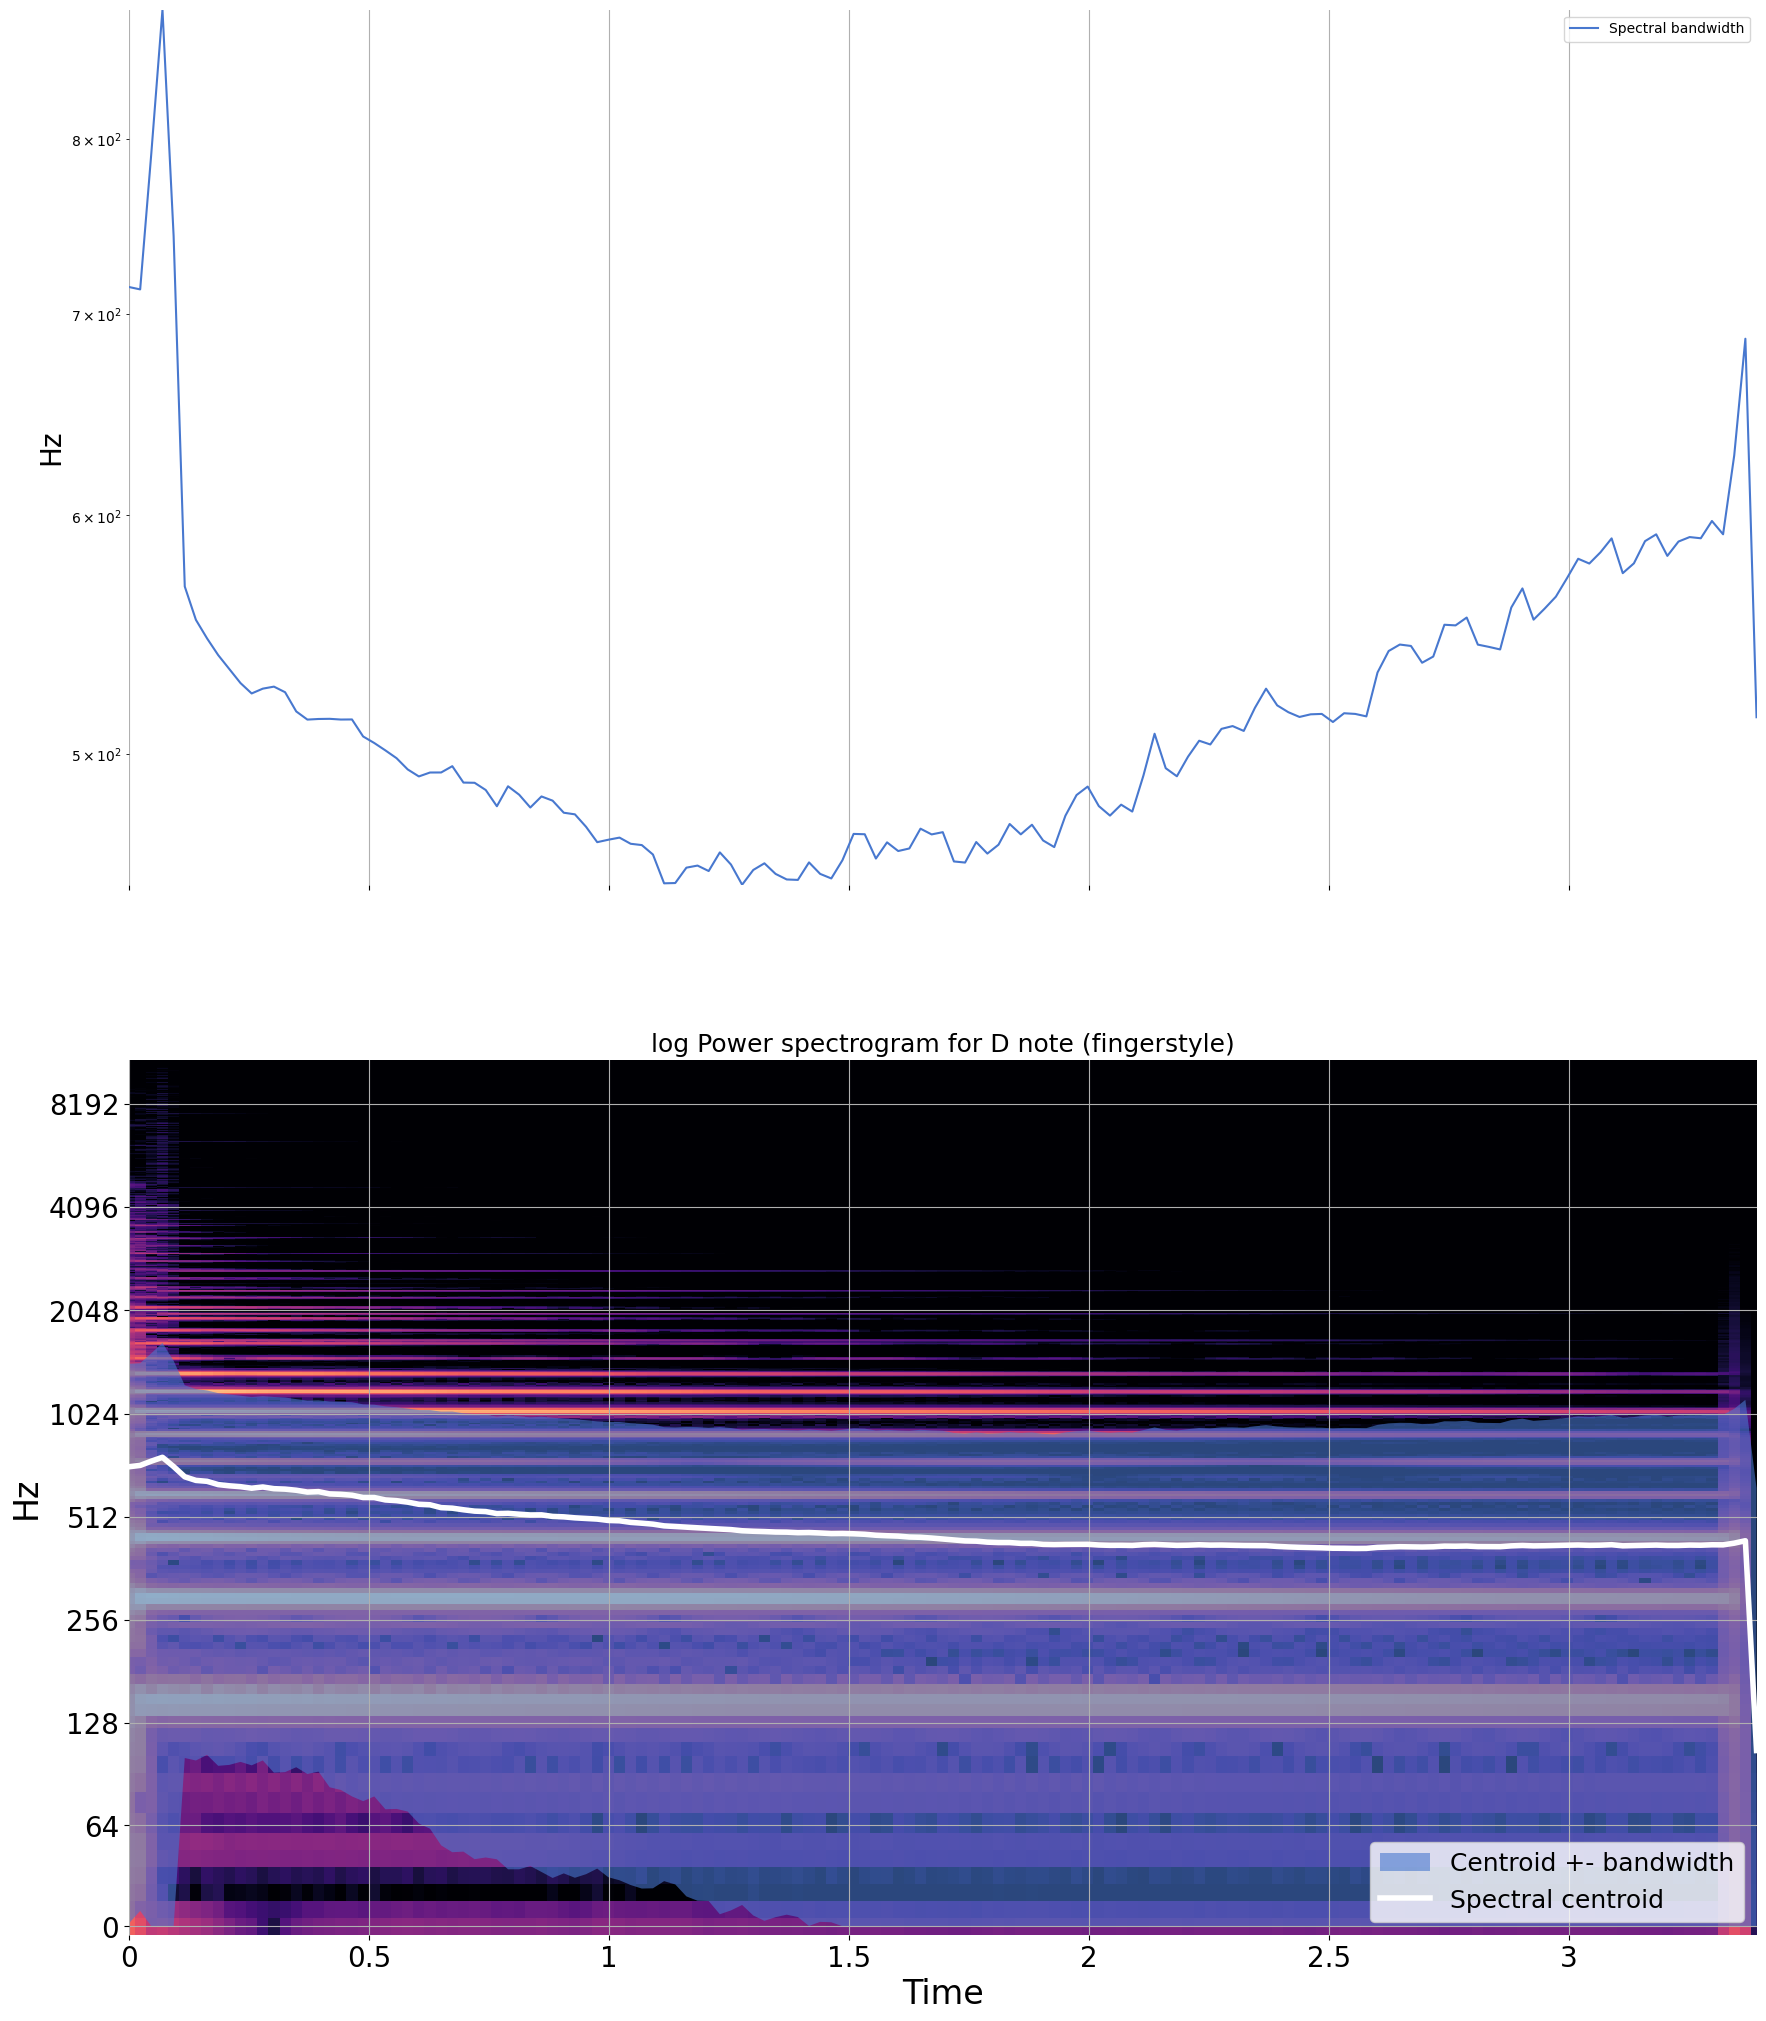

In [567]:
spec_bw_finger = librosa.feature.spectral_bandwidth(y=D_finger, sr=sr_Df)

fig, ax = plt.subplots(figsize=(21, 25), nrows=2, sharex=True)
ax[0].semilogy(times_f, spec_bw_finger[0], label='Spectral bandwidth')
ax[0].set_ylabel('Hz', fontsize=20)
ax[0].set_xticks([])
ax[0].set_xlim([times_f.min(), times_f.max()])
ax[0].tick_params(axis='both', labelsize=20)
ax[0].set_xlabel('Time', fontsize=32)
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_finger, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set_title('log Power spectrogram for D note (fingerstyle)', fontsize=18)
ax[1].fill_between(times_f, np.maximum(0, spectral_centroid_Df[0] - spec_bw_finger[0]),
                   np.minimum(spectral_centroid_Df[0] + spec_bw_finger[0], sr_Df/2),
                   alpha=0.6, label='Centroid +- bandwidth')
ax[1].set_ylabel('Hz', fontsize=24)
ax[1].set_xlabel('Time', fontsize=24)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].plot(times_f, spectral_centroid_Df[0], label='Spectral centroid', color='w', linewidth=4)
ax[1].legend(loc='lower right', fontsize=18)

plt.show()


Как можно заметить на верхних графиках спектральных полос для ноты *ре* при игре разными стилями, теория подтвердилась, т.к. спектральная полоса при игре медиатором заметно уже, чем полоса при игре пальцами, что означает, что при игре пальцами струна звук от струны обладает большим спектральным диапазоном, чем при игре медиатором.

В целом, более широкая спектральная полоса подразумевает более широкое распределение частотных компонентов и более богатое, разнообразное **спектральное содержание сигнала (content)**.

In [568]:
metrics_data = []
categories = ['pick', 'finger']
columns = ['Среднее значение', 'Стандартное отклонение']

# Iterate over each note
for note in audio_df.index.get_level_values('note'):
    note_metrics_data = []
    
    # Iterate over each playstyle (pick and finger)
    for playstyle in categories:
        # Get the audio data and sample rate for the current note and playstyle
        data = audio_df.loc[(note, playstyle), 'data']
        sample_rate = audio_df.loc[(note, playstyle), 'sample_rate']
        
        # Calculate the spectral bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sample_rate, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
        
        # Calculate the metrics
        bandwidth_mean = spectral_bandwidth.mean()
        bandwidth_std = np.std(spectral_bandwidth)
        
        note_metrics_data.extend([bandwidth_mean, bandwidth_std])
    
    metrics_data.append(note_metrics_data)

# Create the DataFrame from the metrics data list
metrics_df = pd.DataFrame(metrics_data, index=notes_list, columns=pd.MultiIndex.from_product([categories, columns], names=['playstyle', None]))
metrics_df.index = pd.MultiIndex.from_tuples(metrics_df.index, names=['note', 'playstyle'])
metrics_df.reset_index(level='playstyle', inplace=True)
metrics_df = metrics_df.drop('playstyle', axis=1)
metrics_df.drop_duplicates(inplace=True)
metrics_df


C:\Users\petrt\AppData\Local\Temp\ipykernel_8172\2377547622.py:30: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  metrics_df = metrics_df.drop('playstyle', axis=1)


playstyle             pick                                  finger   
          Среднее значение Стандартное отклонение Среднее значение   
note                                                                 
E               348.052331             143.757564       303.134179  \
B               748.734034             124.537540       796.721525   
G               912.127653             364.333681       828.346966   
D               435.972249              94.431135       488.625098   
A               475.427979             481.317166       735.341605   
e               938.626394             192.764852      1546.098535   
melody          834.220861             330.637403       906.301160   

playstyle                         
          Стандартное отклонение  
note                              
E                     316.819077  
B                     209.100822  
G                     441.511803  
D                     259.326624  
A                     952.117181  
e                     973.041211  
melody                547.442786

Таблца сверху демонстрирует среднее значение и стандартное отклонение для всех нот при игре разными стилями. Здесь вновь стоит обратить внимание на стандартное отклонение как общий показатель широты частотного диапазона сигнала. Как и предполагалось, для всех аудиосигналов струны, полученных при игре медиатором, данное значение значительно меньше, чем аналогичное при игре пальцами. Из этого можно сделать вывод: более широкий спектральный диапазон характерен при игре пальцами, и наоборот, более узкий диапазон является признаком игры с помощью медиатора.

# Zero-crossing rate

Zero-crossing rate - это мера скорости, с которой сигнал меняет свой знак. Она часто используется для характеристики временных свойств сигнала. ZCR указывает на частоту изменения знака в волновой форме звукового сигнала и предоставляет информацию о количестве быстрых изменений или переходов в сигнале.

ZCR рассчитывается путем подсчета количества раз, когда форма звуковой волны меняет знак или пересекает нулевую ось за определенный промежуток времени. Часто этот показатель измеряется в пересечениях в сек

*ZCR = (количество  пересечений  нуля) / (общее_количество_выборок - 1)*

Форма сигнала обычно делится на кадры, и ZCR рассчитывается для каждого кадра.

ZCR можно использовать как характеристику для анализа и сравнения различных аудиосигналов или стилей воспроизведения. Более высокое значение ZCR обычно указывает на большее количество быстрых изменений или переходных событий в аудиосигнале. Это может быть связано со звуками, имеющими более высокочастотное содержание или ударные элементы. С другой стороны, более низкое значение ZCR указывает на более плавный или устойчивый сигнал с меньшим количеством быстрых изменений.

Чтобы сравнить стили игры с помощью ZCR, можно рассчитать ZCR для каждого стиля игры. Затем можно сравнить средние значения ZCR между стилями игры, чтобы заметить любые различия. Более высокое среднее значение ZCR в одном стиле игры по сравнению с другим может указывать на более агрессивную или насыщенную переходными процессами технику игры, в то время как более низкое среднее значение ZCR может указывать на более плавный или устойчивый стиль игры.

Также показатель ZCR может дать представление о характеристиках "атаки" и переходных процессах при игре на гитаре. В фазе атаки, когда струна выщипывается или ударяется, происходит быстрое изменение формы волны, что приводит к повышению ZCR. Различные стили игры могут демонстрировать изменения ZCR во время атаки, отражая агрессивность или мягкость техники щипка или удара.

Звук ноты *си* при игре медиатором

In [569]:
ipd.Audio(B_pick, rate=sr_Bp)

Звук ноты *си* при игре пальцами

In [570]:
ipd.Audio(B_finger, rate=sr_Bf)

In [571]:
l = 0
r = 1024

,Средний ZCR для всего аудио,Кол-во пересечений в первом фрейме
0,0.054628,117


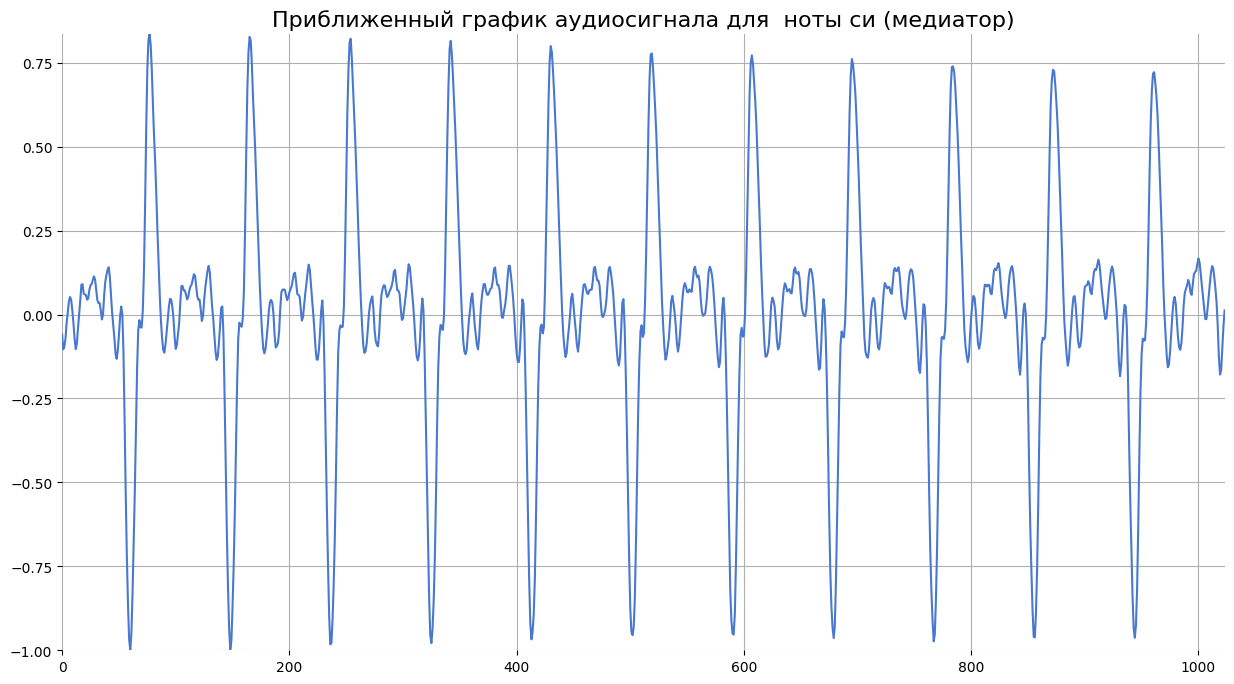

In [582]:
fig, ax = fig, ax = plt.subplots(figsize=(15,8))
ax.plot(B_pick[l:r])
ax.set_title('Приближенный график аудиосигнала для  ноты си (медиатор)', fontsize=16)

zcr_total_p = librosa.feature.zero_crossing_rate(B_pick + 0.0001, pad=False, frame_length=1024, hop_length=512)[0].mean()
zc_number_p = librosa.zero_crossings(B_pick[l:r] + 0.001, pad=False).sum()
data_zcr_p = {
    'Средний ZCR для всего аудио': [zcr_total_p],
    'Кол-во пересечений в первом фрейме': [zc_number_p]
}
df_zcr_p = pd.DataFrame(data_zcr_p)
display(df_zcr_p)

,Средний ZCR для всего аудио,Кол-во пересечений в первом фрейме
0,0.058655,107


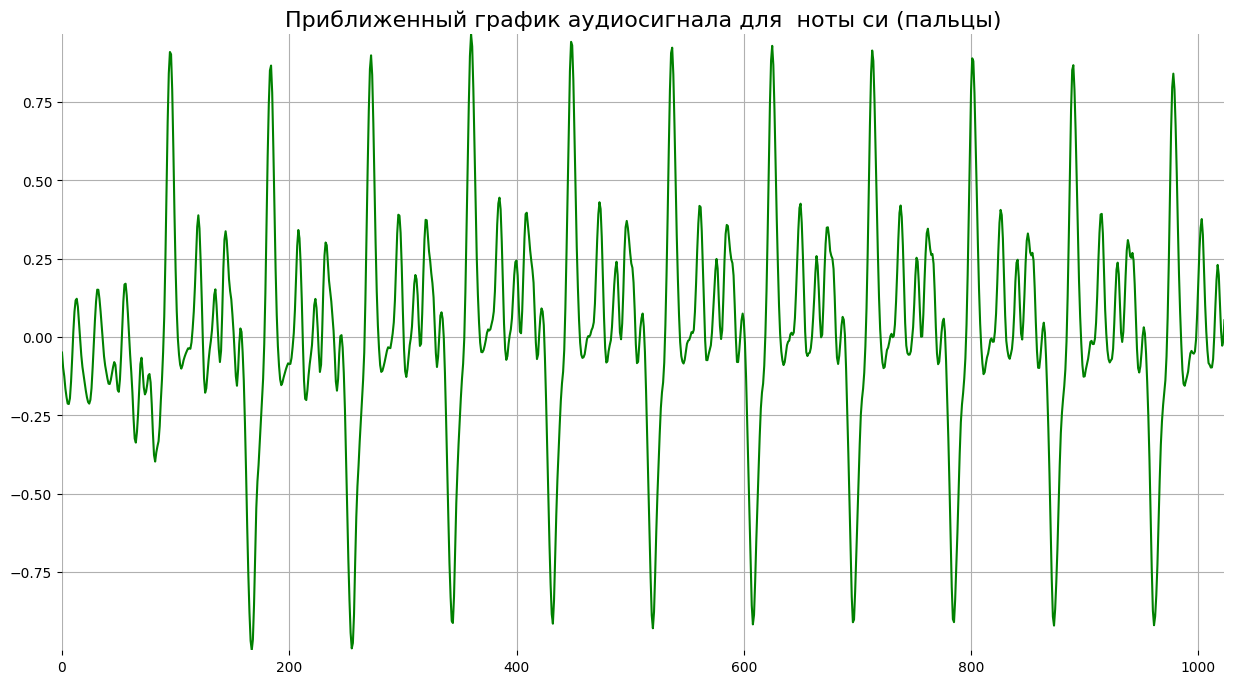

In [579]:
fig, ax = fig, ax = plt.subplots(figsize=(15,8))
ax.plot(B_finger[l:r], color='green')
ax.set_title('Приближенный график аудиосигнала для  ноты си (пальцы)', fontsize=16)

zcr_total_f = librosa.feature.zero_crossing_rate(B_finger + 0.0001, pad=False, frame_length=1024, hop_length=512)[0].mean()
zc_number_f = librosa.zero_crossings(B_finger[l:r] + 0.001, pad=False).sum()
data_zcr_f = {
    'Средний ZCR для всего аудио': [zcr_total_f],
    'Кол-во пересечений в первом фрейме': [zc_number_f]
}
df_zcr_f = pd.DataFrame(data_zcr_f)
display(df_zcr_f)

In [586]:
import numpy as np
import pandas as pd
import librosa
import scipy.stats

metrics_data = []
categories = ['pick', 'finger']
columns = ['Среднее значение', 'Стандартное отклонение', 'Кол-во пересечений в первом фрейме']

# Iterate over each note
for note in audio_df.index.get_level_values('note'):
    note_metrics_data = []
    
    # Iterate over each playstyle (pick and finger)
    for playstyle in categories:
        # Get the audio data and sample rate for the current note and playstyle
        data = audio_df.loc[(note, playstyle), 'data']
        sample_rate = audio_df.loc[(note, playstyle), 'sample_rate']
        
        # Calculate the zero-crossing rate
        zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=1024, hop_length=512)[0]
        zc_number = librosa.zero_crossings(data[l:r] + 0.001, pad=False).sum()
        
        # Calculate the metrics
        zcr_mean = np.mean(zcr)
        zcr_std = np.std(zcr)
        
        note_metrics_data.extend([zcr_mean, zcr_std, zc_number])
    
    metrics_data.append(note_metrics_data)

# Create the DataFrame from the metrics data list
metrics_df = pd.DataFrame(metrics_data, index=notes_list, columns=pd.MultiIndex.from_product([categories, columns], names=['playstyle', None]))
metrics_df.index = pd.MultiIndex.from_tuples(metrics_df.index, names=['note', 'playstyle'])
metrics_df.reset_index(level='playstyle', inplace=True)
metrics_df = metrics_df.drop('playstyle', axis=1)
metrics_df.drop_duplicates(inplace=True)
metrics_df


C:\Users\petrt\AppData\Local\Temp\ipykernel_8172\3522106921.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  metrics_df = metrics_df.drop('playstyle', axis=1)


playstyle             pick                          
          Среднее значение Стандартное отклонение   
note                                                
E                 0.022997               0.018226  \
B                 0.056889               0.021668   
G                 0.080601               0.025217   
D                 0.048637               0.018521   
A                 0.028573               0.017781   
e                 0.062955               0.037690   
melody            0.052356               0.018561   

playstyle                                              finger   
          Кол-во пересечений в первом фрейме Среднее значение   
note                                                            
E                                         44         0.022618  \
B                                        117         0.059946   
G                                        182         0.058776   
D                                        102         0.035482   
A                                         60         0.025001   
e                                        160         0.077421   
melody                                     2         0.036000   

playstyle                                                            
          Стандартное отклонение Кол-во пересечений в первом фрейме  
note                                                                 
E                       0.008716                                 15  
B                       0.019581                                107  
G                       0.018830                                 67  
D                       0.020252                                 22  
A                       0.025080                                 11  
e                       0.038691                                106  
melody                  0.021711                                 13

Результаты сравнения показателя zcr для всех аудифайлов показаили, что средний показатель zcr в основном выше, хоть и совсем незначительно, при игре медиатором. При этом в некоторых случаях среднее значение было выше при игре пальцами, как у ноты ми(нижняя октава) и у ноты соль, хоть и совсем незначительно.

Подтвердилась теория, что при игре медиатором в первые моменты, когда по струне бьют, возникают более частые и резкие колебания. Можно утверждать, что данный признак является отличительной чертой двух стилей игры.

Вывод: при игре медиатором в первые несколько миллисекунд сигнал меняет звой знак чаще, чем при игре пальцами.